# 다중 분류
 - wine 데이터

In [48]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

 - 데이터 전처리

In [49]:
wine = load_wine()
wine.data.shape

(178, 13)

# 데이터 표준화

In [50]:
# X 데이터는 표준화
from sklearn.preprocessing import StandardScaler
wine_std = StandardScaler().fit_transform(wine.data)

In [51]:
# y 데이터는 원핫 인코딩
from tensorflow.keras.utils import to_categorical
Y = to_categorical(wine.target)
Y[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(wine_std, Y, stratify=Y, test_size = 0.2, random_state=seed)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((142, 13), (36, 13), (142, 3), (36, 3))

 - 모델 정의, 설정, 학습, 평가

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([Dense(30,input_dim=13, activation = 'relu'),
                    Dense(12, activation='relu'),
                    Dense(3, activation='softmax')]) # 출력층의 노드 수는 y의 종류 수, 활성화 함수는 softmax

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 30)                420       
                                                                 
 dense_13 (Dense)            (None, 12)                372       
                                                                 
 dense_14 (Dense)            (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [54]:
# 다중 분류시 손실 함수 = categorical_crossentropy
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [55]:
his = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 2s 494ms/step - loss: 1.9052 - accuracy: 0.3097 - val_loss: 1.6885 - val_accuracy: 0.2414
Epoch 2/100
2/2 [==============================] - 0s 57ms/step - loss: 1.7975 - accuracy: 0.3274 - val_loss: 1.5971 - val_accuracy: 0.2414
Epoch 3/100
2/2 [==============================] - 0s 94ms/step - loss: 1.6979 - accuracy: 0.3274 - val_loss: 1.5142 - val_accuracy: 0.2414
Epoch 4/100
2/2 [==============================] - 0s 68ms/step - loss: 1.6102 - accuracy: 0.3363 - val_loss: 1.4398 - val_accuracy: 0.2759
Epoch 5/100
2/2 [==============================] - 0s 64ms/step - loss: 1.5276 - accuracy: 0.3363 - val_loss: 1.3735 - val_accuracy: 0.3103
Epoch 6/100
2/2 [==============================] - 0s 87ms/step - loss: 1.4533 - accuracy: 0.3540 - val_loss: 1.3120 - val_accuracy: 0.3448
Epoch 7/100
2/2 [==============================] - 0s 115ms/step - loss: 1.3849 - accuracy: 0.3894 - val_loss: 1.2561 - val_accuracy: 0.3448
Epoch 8/100
2/2 [=

In [56]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.1301 - accuracy: 0.9722


[0.13005691766738892, 0.9722222089767456]

 - 학습과정 시각화

In [57]:
y_acc = his.history['accuracy']
y_vloss = his.history['val_loss']
xs = np.arange(1,len(y_acc)+1)

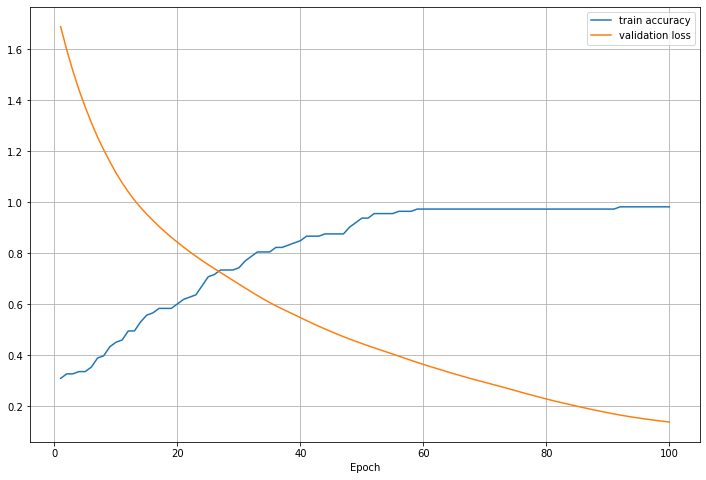

In [58]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('Epoch')
plt.show()

 - epoch 횟수를 더 늘려본다.

In [59]:
model2 = Sequential([Dense(30,input_dim=13, activation = 'relu'),
                    Dense(12, activation='relu'),
                    Dense(3, activation='softmax')]) # 출력층의 노드 수는 y의 종류 수, 활성화 함수는 softmax

model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 30)                420       
                                                                 
 dense_16 (Dense)            (None, 12)                372       
                                                                 
 dense_17 (Dense)            (None, 3)                 39        
                                                                 
Total params: 831
Trainable params: 831
Non-trainable params: 0
_________________________________________________________________


In [60]:
model2.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])

In [61]:
his2 = model2.fit(X_train, Y_train, validation_split=0.2, epochs=1000, batch_size=100, verbose=0)

In [62]:
y_acc2 = his2.history['accuracy']
y_vloss2 = his2.history['val_loss']
xs = np.arange(1,len(y_acc2)+1)

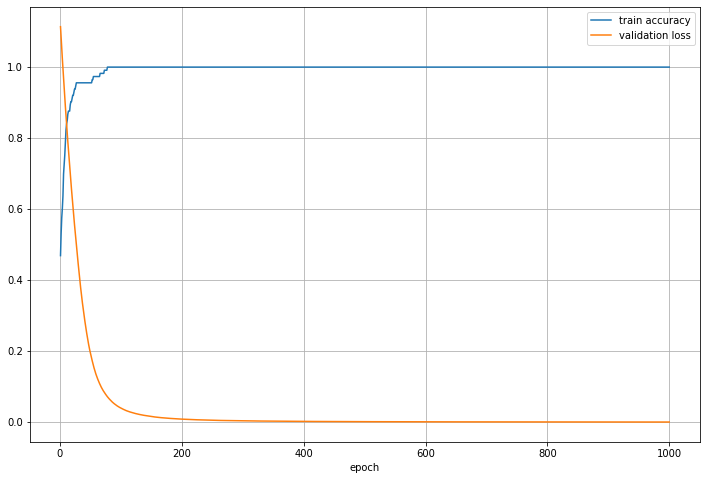

In [63]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc2, label='train accuracy')
plt.plot(xs,y_vloss2, label='validation loss')
plt.legend(), plt.grid()
plt.xlabel('epoch')
plt.show()

 - 모델 저장 및 로드

In [64]:
model2.save('wine.h5')

In [65]:
!ls -l

total 48
drwxr-xr-x 1 root root  4096 May 17 13:39 sample_data
-rw-r--r-- 1 root root 43800 May 23 01:29 wine.h5


In [66]:
from tensorflow.keras.models import load_model
my_model = load_model('wine.h5')

In [67]:
my_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 6.3747e-04 - accuracy: 1.0000


[0.0006374737713485956, 1.0]

 -  실제 데이터 테스트

In [68]:
wine_std[100], Y[100]

(array([-1.13720713, -0.23011443, -2.43634632, -0.59905169, -0.192495  ,
        -0.10433159,  0.14128858, -0.82071924, -0.33447089, -0.76049691,
         1.37126518,  0.49197446, -0.11748635]),
 array([0., 1., 0.], dtype=float32))

In [69]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [70]:
# 데이터 형태를 모두 1차원 형태로 맞춰줘야 한다
my_model.evaluate(wine_std[100].reshape(1,-1), Y[100].reshape(1,-1))

1/1 [==============================] - 0s 15ms/step - loss: 1.9073e-06 - accuracy: 1.0000


[1.9073468138230965e-06, 1.0]